In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
data = pd.read_csv('50_Startups.csv')

In [58]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [60]:
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


# Exploratory Data Analysis

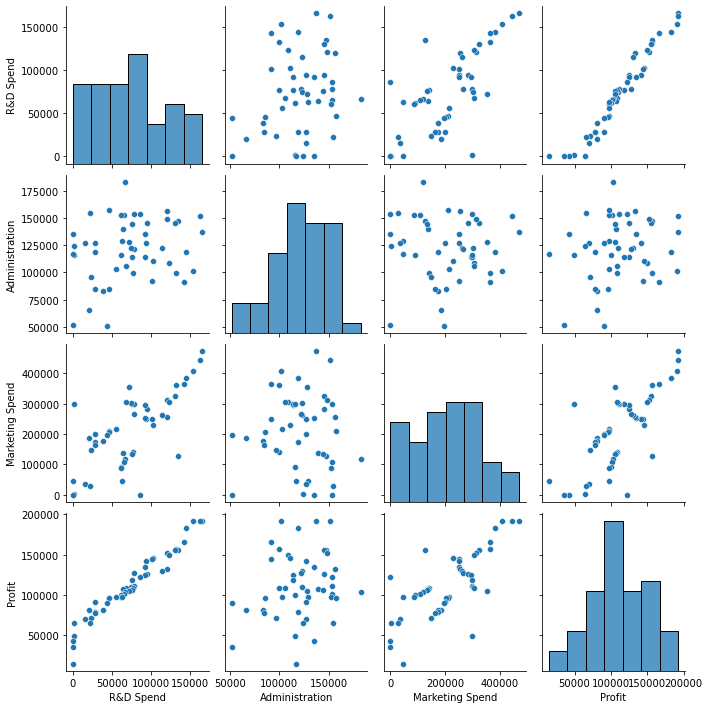

In [61]:
sns.pairplot(data)
plt.show()

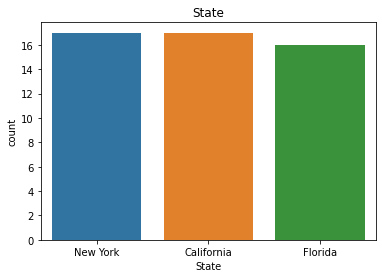

In [62]:
sns.countplot(data=data,x='State')
plt.title('State')
plt.show()

In [63]:
data.State.value_counts()

California    17
New York      17
Florida       16
Name: State, dtype: int64

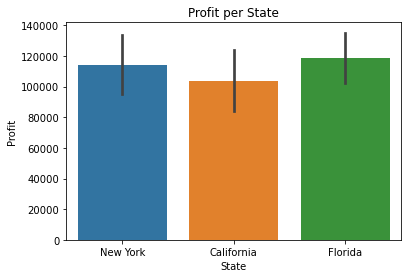

In [64]:
sns.barplot(data=data,x='State',y='Profit')
plt.title('Profit per State')
plt.show()

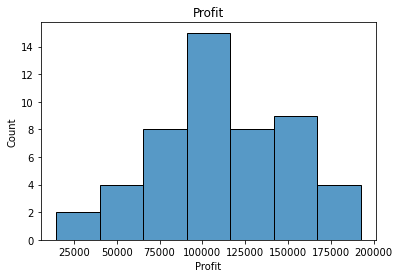

In [65]:
sns.histplot(data['Profit'])
plt.title('Profit')
plt.show()

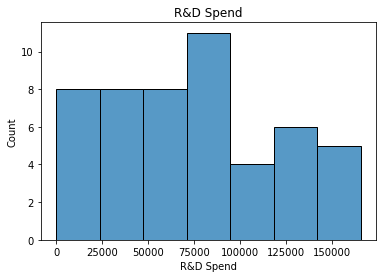

In [66]:
sns.histplot(data['R&D Spend'])
plt.title('R&D Spend')
plt.show()

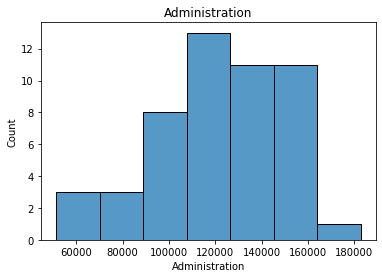

In [67]:
sns.histplot(data['Administration'])
plt.title('Administration')
plt.show()

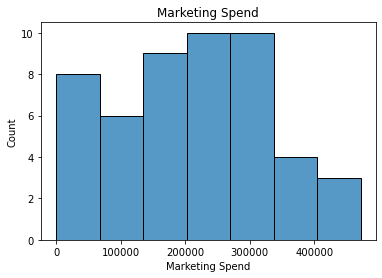

In [68]:
sns.histplot(data['Marketing Spend'])
plt.title('Marketing Spend')
plt.show()

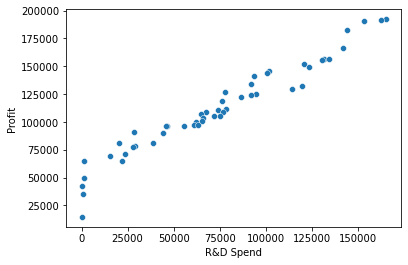

In [69]:
sns.scatterplot(x=data['R&D Spend'],y=data['Profit'])
plt.show()

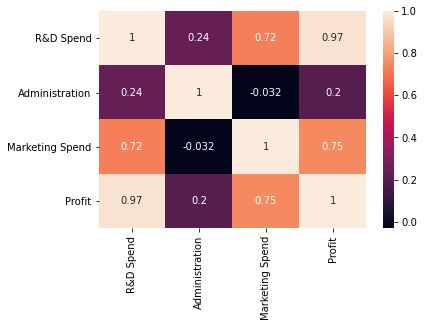

In [70]:
sns.heatmap(data.corr(),annot=True)
plt.show()

# Training the model

In [71]:
dummy_ds = pd.get_dummies(data,drop_first=True)
dummy_ds.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,1
1,162597.70,151377.59,443898.53,191792.06,0,0
2,153441.51,101145.55,407934.54,191050.39,1,0
3,144372.41,118671.85,383199.62,182901.99,0,1
4,142107.34,91391.77,366168.42,166187.94,1,0


In [72]:
dummy_ds.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'Profit',
       'State_Florida', 'State_New York'],
      dtype='object')

In [73]:
X = dummy_ds[['R&D Spend', 'Administration', 'Marketing Spend','State_Florida', 'State_New York']]
y = dummy_ds['Profit']

# Train Test Split

In [87]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

# Standardization

In [88]:
# from sklearn.preprocessing import StandardScaler
# from sklearn.pipeline import Pipeline

# pipeline = Pipeline([('std_scaler',StandardScaler())])

# X_train = pipeline.fit_transform(X_train)
# X_test = pipeline.fit_transform(X_test)

# Linear Regression

In [89]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression(normalize=True)
reg.fit(X_train,y_train)

LinearRegression(normalize=True)

# Model Evaluation

In [90]:
print(reg.intercept_)

57412.64071473845


In [91]:
coeff_df = pd.DataFrame(reg.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
R&D Spend,0.804937
Administration,-0.091258
Marketing Spend,0.028067
State_Florida,458.070775
State_New York,-1235.156732


# Prediction from our model

In [92]:
pred = reg.predict(X_test)

In [93]:
obs = pd.DataFrame({'Actual Values':y_test,'Predicted Values':pred})
obs

,Actual Values,Predicted Values
13,134307.35,126187.394115
39,81005.76,85788.822595
30,99937.59,99777.028152
45,64926.08,45706.122383
17,125370.37,127062.207228
48,35673.41,51891.838845
26,105733.54,109114.629775
25,107404.34,100600.611237
32,97427.84,97953.998747
19,122776.86,111730.577068


In [94]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

def cross_val(model):
    pred = cross_val_score(model,X,y,cv=10)
    return pred.mean()

def print_evaluate(true,predicted):
    mae = metrics.mean_absolute_error(true,predicted)
    mse = metrics.mean_squared_error(true,predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true,predicted))
    r2_square = metrics.r2_score(true,predicted)
    print('MAE :',mae)
    print('MSE :',mse)
    print('RMSE :',rmse)
    print('R2 Square:',r2_square)
    
def evaluate(true,predicted):
    mae = metrics.mean_absolute_error(true,predicted)
    mse = metrics.mean_squared_error(true,predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true,predicted))
    r2_squre = metrics.r2_score(true,predicted)
    return mae,mse,rmse,r2_squre


In [95]:
test_pred = reg.predict(X_test)
train_pred = reg.predict(X_train)

print('Test set evaluation : ')
print_evaluate(y_test,test_pred)
print('\n')
print('Train set evaluation : ')
print_evaluate(y_train,train_pred)

Test set evaluation : 
MAE : 7395.433531523909
MSE : 84826955.03533405
RMSE : 9210.154995185154
R2 Square: 0.9397108063355787


Train set evaluation : 
MAE : 6644.5547334057865
MSE : 81555412.19861054
RMSE : 9030.803518990464
R2 Square: 0.9511471170962384


In [96]:
import pickle

pickle.dump(reg,open('usecase.pkl','wb'))

In [104]:
X_test,y_test

(    R&D Spend  Administration  Marketing Spend  State_Florida  State_New York
 13   91992.39       135495.07        252664.93              0               0
 39   38558.51        82982.09        174999.30              0               0
 30   61994.48       115641.28         91131.24              1               0
 45    1000.23       124153.04          1903.93              0               1
 17   94657.16       145077.58        282574.31              0               1
 48     542.05        51743.15             0.00              0               1
 26   75328.87       144135.98        134050.07              1               0
 25   64664.71       139553.16        137962.62              0               0
 32   63408.86       129219.61         46085.25              0               0
 19   86419.70       153514.11             0.00              0               1
 12   93863.75       127320.38        249839.44              1               0
 4   142107.34        91391.77        366168.42     